#21.4 Simpson’s Rule

Consider two consecutive subintervals, $[x_{i-1}, x_i]$ and $[x_i, x_{i+1}]$. Simpson’s Rule approximates the area under $f(x)$ over these two subintervals by fitting a quadratic polynomial through the points $(x_{i-1}, f(x_{i-1})), (x_i, f(x_i)), and (x_{i+1}, f(x_{i+1}))$, which is a unique polynomial, and then integrating the quadratic exactly. The following shows this integral approximation for an arbitrary function. 



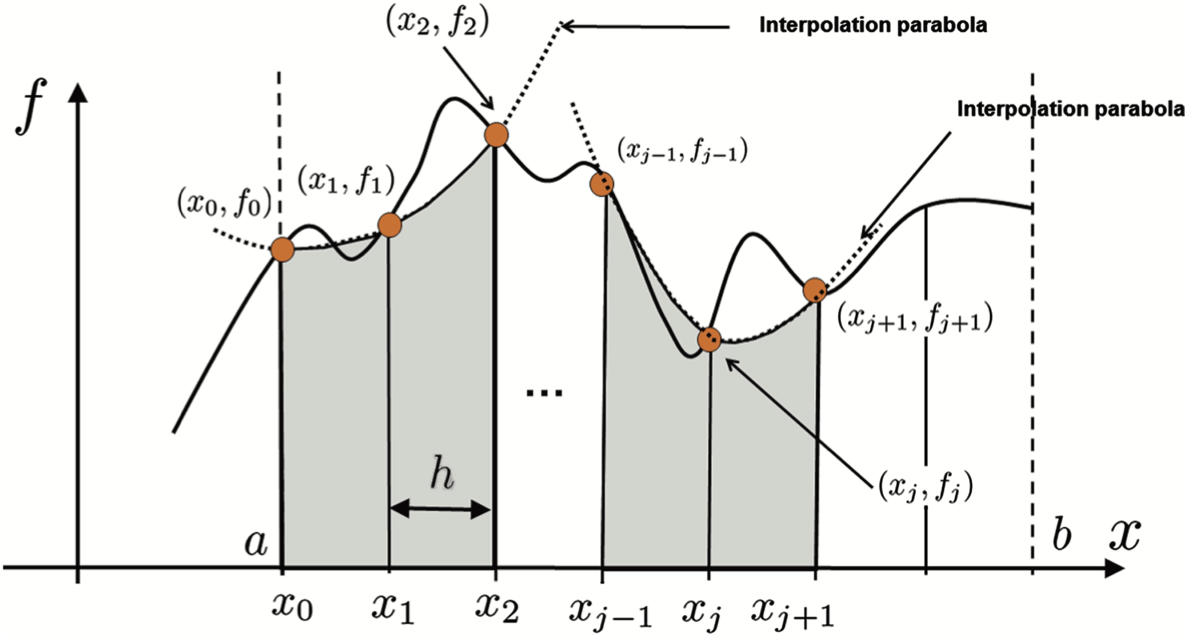


Regrouping

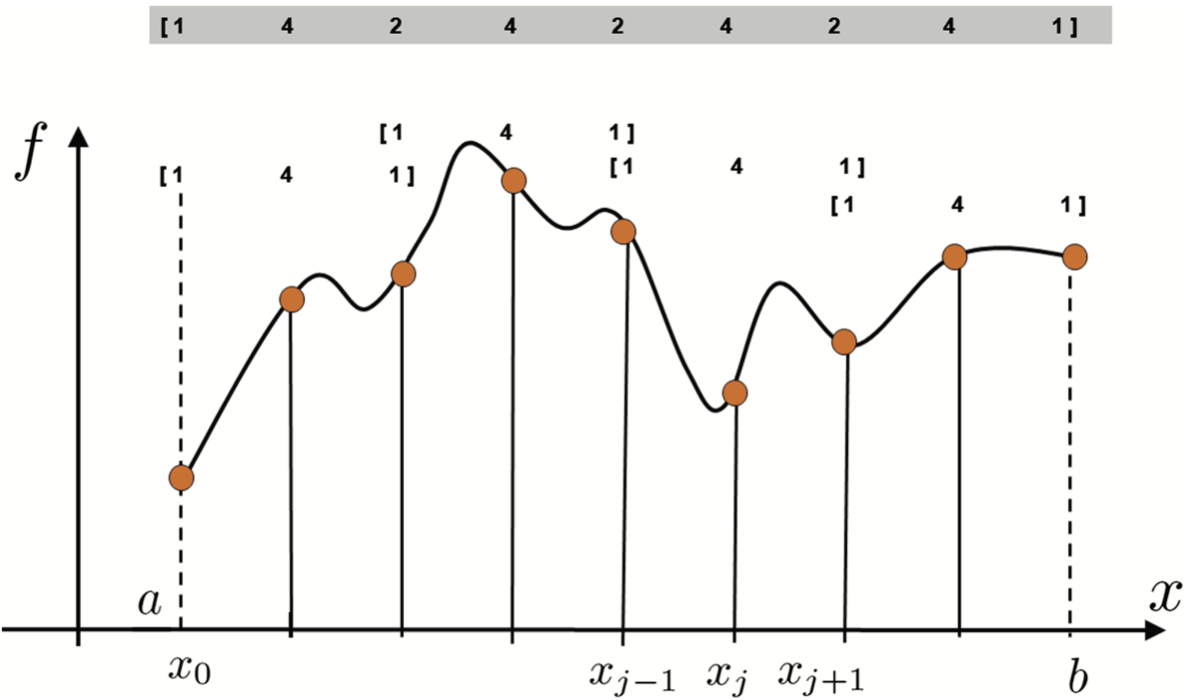

Simpson’s Rule:

$\int_{x_{i-1}}^{x_{i+1}} f(x) dx = \frac{h}{3}(f(x_{i-1}) + 4f(x_i) + f(x_{i+1})) + O(h^5).$

Because $\frac{h}{3}(f(x_{i-1}) + 4f(x_i) + f(x_{i+1}))$ is exactly the Simpson’s Rule approximation for the integral over this subinterval, this equation implies that Simpson’s Rule is $O(h^5)$ over a subinterval and $O(h^4)$ over the whole interval. Because the $h^3$ terms cancel out exactly, Simpson’s Rule gains another two orders of accuracy.

**Example:**

Use Simpson’s Rule to approximate $f(x)= \frac{1}{1+x^2}$, over the interval $[0,5]$ with a partition of size $N=10$.

In [1]:
import numpy as np

In [5]:
f = lambda x : 1/(1+x**2)
a = 0 
b = 5
N = 10

h = (b-a)/N
x = np.linspace(a,b,N+1)
y = f(x)
Simp = h/3 * np.sum(y[0:-1:2] + 4*y[1::2] + y[2::2])
print('Simpson’s Rule Approximation is', Simp)

Simpson’s Rule Approximation is 1.371454008759302


Since $\int_0^5\frac{1}{1+x^2} dx = arctan(5)$

In [6]:
I = np.arctan(5)
print(I)

1.373400766945016


In [7]:
print('Simpson’s Rule Approximation Error:', np.abs(Simp - I))

Simpson’s Rule Approximation Error: 0.0019467581857139926


#21.5 Computing Integrals in Python

In [8]:
import numpy as np
from scipy.integrate import trapz

In [37]:
y = 1/(1+x**2)
a = 0 
b = 5
N = 11
h = (b - a) / (N - 1)
x = np.linspace(a, b, N)
I_trapz = trapz(y,x)
I_trap = (h/2)*(y[0] + 2 * sum(y[1:N-1]) + y[N-1])
print(I_trapz)
print(I_trap)

1.3731040812301096
1.3731040812301096


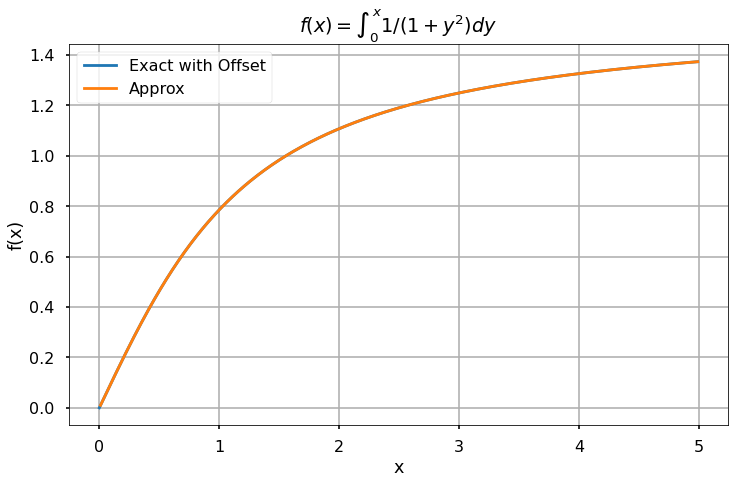

In [49]:
from scipy.integrate import cumtrapz
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn-poster')

x = np.arange(0, 5, 0.01)
F_exact = np.arctan(x)
F_approx = cumtrapz(1/(1+x**2), x)

plt.figure(figsize = (10,6))
plt.plot(x, F_exact)
plt.plot(x[1::], F_approx)
plt.grid()
plt.tight_layout()
plt.title('$f(x)=\int_0^x 1/(1+y^2) dy$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['Exact with Offset', 'Approx'])
plt.show()

In [55]:
from scipy.integrate import quad 
y = 1/(1+x**2)
y = f(x)
I_quad, est_err_quad = \
          quad(f, 0, 5)
print(I_quad)
err_quad = 2 - I_quad
print(est_err_quad, err_quad)

1.3734007669450166
7.167069904541812e-09 0.6265992330549834
